In [1]:
import pandas as pd
import numpy as np

# Loading Data

In [2]:
data = pd.read_csv('data_full_and_cleaned.csv', encoding = 'ANSI', dtype = {'election_year':np.int32, 'election_round':np.int32, 'department_code':str, 'city_code':np.int32,
       'city_name':str, 'polling_station':str, 'total_registered_voters':np.int32,
       'total_votes':np.int32, 'valid_votes':np.int32, 'candidate':str, 'votes_for_candidate':np.int32,
       'INSEE':np.int32})
data.head()

,election_year,election_round,department_code,city_code,city_name,polling_station,total_registered_voters,total_votes,valid_votes,candidate,votes_for_candidate
0,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,BRUNO MEGRET,14
1,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,CORINNE LEPAGE,9
2,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,DANIEL GLUCKSTEIN,1
3,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,FRANÇOIS BAYROU,30
4,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,JACQUES CHIRAC,66


In [3]:
data[(data['department_code']=='14') & (data['city_code']==118) & (data['election_year']==2017) & (data['election_round']==1)]

,election_year,election_round,department_code,city_code,city_name,polling_station,total_registered_voters,total_votes,valid_votes,candidate,votes_for_candidate
2896277,2017,1,14,118,Caen,1.1,1267,1055,1039,NICOLAS DUPONT-AIGNAN,23
2896278,2017,1,14,118,Caen,2.1,950,792,780,NICOLAS DUPONT-AIGNAN,17
2896279,2017,1,14,118,Caen,2.2,1087,912,898,NICOLAS DUPONT-AIGNAN,16
2896280,2017,1,14,118,Caen,3.1,1133,973,950,NICOLAS DUPONT-AIGNAN,33
2896281,2017,1,14,118,Caen,3.2,1133,960,945,NICOLAS DUPONT-AIGNAN,23
...,...,...,...,...,...,...,...,...,...,...,...
3588748,2017,1,14,118,Caen,19.3,1196,976,959,FRANÇOIS FILLON,142
3588749,2017,1,14,118,Caen,23.1,1086,908,892,FRANÇOIS FILLON,193
3588750,2017,1,14,118,Caen,23.2,1171,975,958,FRANÇOIS FILLON,233
3588751,2017,1,14,118,Caen,23.3,1076,910,899,FRANÇOIS FILLON,213


In [4]:
zipcodes = pd.read_csv('codes_postaux.txt', encoding = 'ANSI', sep = ';')
zipcodes

,Commune,Codepos,Departement,INSEE
0,L ABERGEMENT CLEMENCIAT,01400,AIN,1001
1,L ABERGEMENT DE VAREY,01640,AIN,1002
2,AMAREINS,01090,AIN,1003
3,AMBERIEU EN BUGEY,01500,AIN,1004
4,AMBERIEUX EN DOMBES,01330,AIN,1005
...,...,...,...,...
38943,TOUHO,98831,NOUVELLE-CALEDONIE,98830
38944,YATE,98834,NOUVELLE-CALEDONIE,98832
38945,TONTOUTA,98840,NOUVELLE-CALEDONIE,98890
38946,KOUAOUA,98818,NOUVELLE-CALEDONIE,98891


In [5]:
dept_lookup = pd.read_csv('department_lookup.csv')
dept_lookup

,department_code,department_name
0,1,Ain
1,2,Aisne
2,3,Allier
3,4,Alpes-de-Haute-Provence
4,5,Hautes-Alpes
...,...,...
102,ZP,Polynésie française
103,ZS,Saint-Pierre-et-Miquelon
104,ZW,Wallis et Futuna
105,ZX,Saint-Martin/Saint-Barthélemy


# Data quality check

In [6]:
data.isna().sum()

election_year              0
election_round             0
department_code            0
city_code                  0
city_name                  0
polling_station            0
total_registered_voters    0
total_votes                0
valid_votes                0
candidate                  0
votes_for_candidate        0
dtype: int64

In [7]:
zipcodes.isna().sum()

Commune        0
Codepos        1
Departement    0
INSEE          0
dtype: int64

In [8]:
zipcodes[zipcodes['Codepos'].isna()]

,Commune,Codepos,Departement,INSEE
16322,LAJOUX,NaN,JURA,39274


A quick Google search gave me the missing zipcode
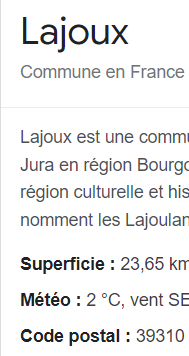

In [9]:
zipcodes['Codepos'] = zipcodes['Codepos'].fillna('39310')

In [10]:
zipcodes.isna().sum()

Commune        0
Codepos        0
Departement    0
INSEE          0
dtype: int64

In [11]:
zipcodes

,Commune,Codepos,Departement,INSEE
0,L ABERGEMENT CLEMENCIAT,01400,AIN,1001
1,L ABERGEMENT DE VAREY,01640,AIN,1002
2,AMAREINS,01090,AIN,1003
3,AMBERIEU EN BUGEY,01500,AIN,1004
4,AMBERIEUX EN DOMBES,01330,AIN,1005
...,...,...,...,...
38943,TOUHO,98831,NOUVELLE-CALEDONIE,98830
38944,YATE,98834,NOUVELLE-CALEDONIE,98832
38945,TONTOUTA,98840,NOUVELLE-CALEDONIE,98890
38946,KOUAOUA,98818,NOUVELLE-CALEDONIE,98891


# Preparing the data before joining datasets

In [12]:
print(len(zipcodes['Commune']))
print(len(zipcodes['Commune'].unique()))

38948
36016


We see that some Commune/city names can be duplicate (36 016 unique names for 38 948 in total). I thus need to find a unique identification point.

In [13]:
print(len(zipcodes['INSEE']))
print(len(zipcodes['INSEE'].unique()))

38948
38948


The INSEE code is thus unique and could be used as a key if it matches with the city_code available in my main data set.

##### INSEE code exploration

In [14]:
zipcodes.dtypes

Commune        object
Codepos        object
Departement    object
INSEE           int64
dtype: object

All INSEE ids are numbers, but some departments (2A and 2B for Corsica) have letters in them, so I need to investigate what their insee code look like.

In [15]:
zipcodes[zipcodes['Departement'].str.contains('CORSE')]

,Commune,Codepos,Departement,INSEE
7394,AFA,20167,CORSE,20001
7395,AGHIONE,20270,CORSE,20002
7396,AITI,20244,CORSE,20003
7397,AJACCIO,20000,CORSE,20004
7398,ALANDO,20212,CORSE,20005
...,...,...,...,...
7803,TRAVO,20240,CORSE,20968
7804,VACAJA,20270,CORSE,20969
7805,VALROSE,20290,CORSE,20970
7806,VERGIO,20224,CORSE,20971


They are thus treated as a common 20 and not 2A or 2B.

From the zipcodes dataset, I have the impression that the INSEE code starts with the one or two digits of the department code, followed by three digit number (00X up to 9, 0XX up to 99 and XXX above 99). This can only be the case if each department has less than 1.000 cities.

In [16]:
# 1. Let's check that all the city_codes in the data dataset are lower than 1000
max_city_code=0
for dept in data['department_code'].unique():
    temp = data[data['department_code']==dept]
    temp_max = np.max(list(temp['city_code']))
    if temp_max > max_city_code:
        max_city_code = temp_max

print(max_city_code)

909


It seems to work. I will build a column in the data set to create the INSEE number from the already existing department and city codes

In [17]:
def insee(row):
    
    if row['department_code'] in ['2A', '2B']:
        dept = 20
    else:
        dept = row['department_code']
    
    city_code = row['city_code']
    
    if city_code < 10:
        zero = '00'
    elif city_code < 100:
        zero='0'
    else:
        zero=''
    insee = str(dept) + zero + str(city_code)
    return insee

In [18]:
data['INSEE'] = data.apply(insee, axis=1)
data

,election_year,election_round,department_code,city_code,city_name,polling_station,total_registered_voters,total_votes,valid_votes,candidate,votes_for_candidate,INSEE
0,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,BRUNO MEGRET,14,1001
1,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,CORINNE LEPAGE,9,1001
2,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,DANIEL GLUCKSTEIN,1,1001
3,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,FRANÇOIS BAYROU,30,1001
4,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,JACQUES CHIRAC,66,1001
...,...,...,...,...,...,...,...,...,...,...,...,...
3788501,2017,2,ZZ,226,Wuhan,1,369,214,204,MARINE LE PEN,19,ZZ226
3788502,2017,2,ZZ,227,Yaounde,1,1517,729,690,MARINE LE PEN,109,ZZ227
3788503,2017,2,ZZ,228,Zagreb,1,656,245,235,MARINE LE PEN,53,ZZ228
3788504,2017,2,ZZ,229,Zurich,1,21488,11247,10888,MARINE LE PEN,1112,ZZ229


In [19]:
zip = zipcodes[['Codepos', 'INSEE']]
zip['INSEE'] = zip['INSEE'].apply(lambda x: str(x))
zip.dtypes

C:\Users\ebour\AppData\Local\Temp/ipykernel_18200/2658606394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zip['INSEE'] = zip['INSEE'].apply(lambda x: str(x))


Codepos    object
INSEE      object
dtype: object

In [20]:
data_test = data.merge(zip, on = 'INSEE', how = 'left')
data_test

,election_year,election_round,department_code,city_code,city_name,polling_station,total_registered_voters,total_votes,valid_votes,candidate,votes_for_candidate,INSEE,Codepos
0,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,BRUNO MEGRET,14,1001,01400
1,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,CORINNE LEPAGE,9,1001,01400
2,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,DANIEL GLUCKSTEIN,1,1001,01400
3,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,FRANÇOIS BAYROU,30,1001,01400
4,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,JACQUES CHIRAC,66,1001,01400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788501,2017,2,ZZ,226,Wuhan,1,369,214,204,MARINE LE PEN,19,ZZ226,NaN
3788502,2017,2,ZZ,227,Yaounde,1,1517,729,690,MARINE LE PEN,109,ZZ227,NaN
3788503,2017,2,ZZ,228,Zagreb,1,656,245,235,MARINE LE PEN,53,ZZ228,NaN
3788504,2017,2,ZZ,229,Zurich,1,21488,11247,10888,MARINE LE PEN,1112,ZZ229,NaN


In [21]:
data_test.isna().sum()

election_year                   0
election_round                  0
department_code                 0
city_code                       0
city_name                       0
polling_station                 0
total_registered_voters         0
total_votes                     0
valid_votes                     0
candidate                       0
votes_for_candidate             0
INSEE                           0
Codepos                    199603
dtype: int64

In [22]:
list(data_test[data_test['Codepos'].isna()]['INSEE'].unique())

['13055',
 '26383',
 '50520',
 '54602',
 '69123',
 '75056',
 'ZA101',
 'ZA102',
 'ZA103',
 'ZA104',
 'ZA105',
 'ZA106',
 'ZA107',
 'ZA108',
 'ZA109',
 'ZA110',
 'ZA111',
 'ZA112',
 'ZA113',
 'ZA114',
 'ZA115',
 'ZA116',
 'ZA117',
 'ZA118',
 'ZA119',
 'ZA120',
 'ZA121',
 'ZA122',
 'ZA123',
 'ZA124',
 'ZA125',
 'ZA126',
 'ZA127',
 'ZA128',
 'ZA129',
 'ZA130',
 'ZA131',
 'ZA132',
 'ZA133',
 'ZA134',
 'ZB201',
 'ZB202',
 'ZB203',
 'ZB204',
 'ZB205',
 'ZB206',
 'ZB207',
 'ZB208',
 'ZB209',
 'ZB210',
 'ZB211',
 'ZB212',
 'ZB213',
 'ZB214',
 'ZB215',
 'ZB216',
 'ZB217',
 'ZB218',
 'ZB219',
 'ZB220',
 'ZB221',
 'ZB222',
 'ZB223',
 'ZB224',
 'ZB225',
 'ZB226',
 'ZB227',
 'ZB228',
 'ZB229',
 'ZB230',
 'ZB231',
 'ZB232',
 'ZB233',
 'ZB234',
 'ZC301',
 'ZC302',
 'ZC303',
 'ZC304',
 'ZC305',
 'ZC306',
 'ZC307',
 'ZC308',
 'ZC309',
 'ZC310',
 'ZC311',
 'ZC312',
 'ZC313',
 'ZC314',
 'ZC352',
 'ZC353',
 'ZC356',
 'ZC357',
 'ZC358',
 'ZC360',
 'ZC361',
 'ZC362',
 'ZD401',
 'ZD402',
 'ZD403',
 'ZD404',


In [23]:
#  All the codes starting with a Z are related to overseas territories or abroad locations

# I'll first extract those specific areas
oversea_and_abroad = dept_lookup[dept_lookup['department_code'].str.contains('Z')]

#  and store them in a dictionnary
oversea_and_abroad = oversea_and_abroad.set_index('department_code').T.to_dict('list')

# Code to go from df to dict found here :
# https://stackoverflow.com/questions/26716616/convert-a-pandas-dataframe-to-a-dictionary

oversea_and_abroad

{'ZA': ['Guadeloupe'],
 'ZB': ['Martinique'],
 'ZC': ['Guyane'],
 'ZD': ['La Réunion'],
 'ZM': ['Mayotte'],
 'ZN': ['Nouvelle-Calédonie'],
 'ZP': ['Polynésie française'],
 'ZS': ['Saint-Pierre-et-Miquelon'],
 'ZW': ['Wallis et Futuna'],
 'ZX': ['Saint-Martin/Saint-Barthélemy'],
 'ZZ': ['Français établis hors de France']}

In [24]:
oversea_and_abroad['ZZ'] = 'Abroad'

In [25]:
def codepos_cleaning(row):
    if row['department_code'] in oversea_and_abroad.keys():
        return oversea_and_abroad[row['department_code']]
    else :
        return row['Codepos']

In [26]:
data_test['Codepos'] = data_test.apply(codepos_cleaning, axis=1)
data_test.isna().sum()

election_year                  0
election_round                 0
department_code                0
city_code                      0
city_name                      0
polling_station                0
total_registered_voters        0
total_votes                    0
valid_votes                    0
candidate                      0
votes_for_candidate            0
INSEE                          0
Codepos                    92803
dtype: int64

The number of NaN has signifoicantly decreased, but remains high. Let's look at the areas that are problematic.

In [27]:
data_test[data_test['Codepos'].isna()]['INSEE'].value_counts()

75056    50246
13055    26436
69123    15988
54602       57
50520       44
26383       32
Name: INSEE, dtype: int64

We can see that the main issues come from Paris (75056), Marseille (13055) and Lyon (69123). We will have to address them separately.

Google serach about insee code 54602 indicates it is related to the Han-Devant-Pierrepont city.
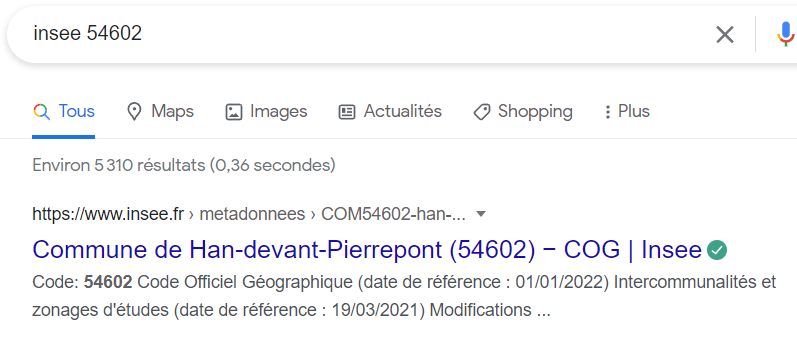

In [28]:
zipcodes[zipcodes['Commune'].str.contains('PIERREPONT')]

,Commune,Codepos,Departement,INSEE
585,BUCY LES PIERREPONT,02350,AISNE,2133
936,MISSY LES PIERREPONT,02350,AISNE,2486
1050,PIERREPONT,02350,AISNE,2600
5343,PIERREPONT,14690,CALVADOS,14502
20252,ST NICOLAS DE PIERREPONT,50250,MANCHE,50528
20271,ST SAUVEUR DE PIERREPONT,50250,MANCHE,50548
22264,PIERREPONT,54620,MEURTHE ET MOSELLE,54428
22685,HAN DEVANT PIERREPONT,54620,MEURTHE ET MOSELLE,55227
35123,PIERREPONT SUR AVRE,80500,SOMME,80625
37338,PIERREPONT SUR L ARENTE,88600,VOSGES,88348


Codepos for that area is thus 54620.

Same process for 50520 :
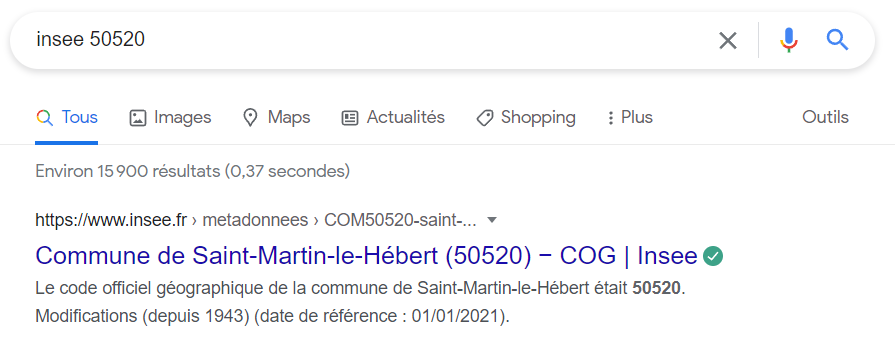

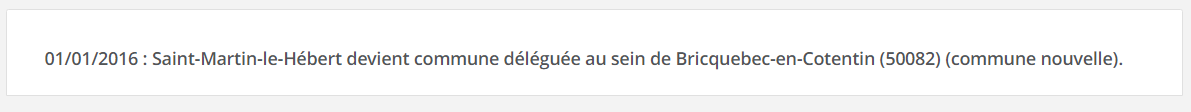

In [29]:
zipcodes[zipcodes['Commune'].str.contains('BRICQUEBEC')]

,Commune,Codepos,Departement,INSEE
19814,BRICQUEBEC,50260,MANCHE,50082


--> Codepos is 50250

Same again for 26383
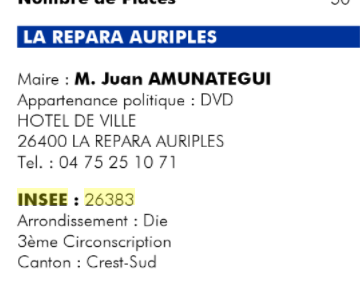

In [30]:
zipcodes[zipcodes['Commune'].str.contains('REPARA')]

,Commune,Codepos,Departement,INSEE
4733,LE PUY STE REPARADE,13610,BOUCHES DU RHONE,13080
7705,SANTA REPARATA DI BALAGNA,20220,CORSE,20316
7706,SANTA REPARATA DI MORIANI,20230,CORSE,20317
10446,LA REPARA AURIPLES,26400,DROME,26020


In [31]:
def codepos_cleaning_2(row):
    if row['INSEE'] == '54602':
        return '54620'
    elif row['INSEE'] == '50520':
        return '50260'
    elif row['INSEE'] == '26383':
        return '26400'
    else:
        return row['Codepos']

In [32]:
data_test['Codepos'] = data_test.apply(codepos_cleaning_2, axis=1)
data_test.isna().sum()

election_year                  0
election_round                 0
department_code                0
city_code                      0
city_name                      0
polling_station                0
total_registered_voters        0
total_votes                    0
valid_votes                    0
candidate                      0
votes_for_candidate            0
INSEE                          0
Codepos                    92670
dtype: int64

In [33]:
data_test[data_test['Codepos'].isna()]['INSEE'].value_counts()

75056    50246
13055    26436
69123    15988
Name: INSEE, dtype: int64

For those three remaining areas, I'll need extra data.

# Additional data source found with detail of the polling stations

In [34]:
# bureaux = pd.read_csv('bureaux-vote-france-2017.csv', encoding='ANSI', sep=';')
# bureaux

In [35]:
# bureaux_sample = bureaux[bureaux['DÃ©partement'].isin(['13', '69','75'])]
# bureaux_sample

In [36]:
# bureaux_sample = bureaux_sample[['Code INSEE', 'Code Bureau Vote', 'Code Postal', 'DÃ©partement']]
# bureaux_sample.isna().sum()

In [37]:
# bureaux_sample['Code Bureau Vote'] = bureaux_sample['Code Bureau Vote'].apply(lambda x: int(x))

In [38]:
# data_test['boolean'] = data_test['Codepos'].isna()

In [39]:
# def codepos_cleaning_3(row):
#     bureau = row['polling_station']
#     department = row['department_code']
    
#     if row['boolean']:
#         temp_df = bureaux_sample[bureaux_sample['DÃ©partement']==department]
#         temp_df = temp_df[temp_df['Code Bureau Vote'] == bureau]
#         return list(temp_df['Code Postal'])[0]
#     else :
#         return row['Codepos']

In [40]:
# data_test['Codepos'] = data_test.apply(codepos_cleaning_3, axis=1)
# data_test.isna().sum()

In [41]:
# df = data_test[data_test['boolean']==True]
# df = df[df['department_code']=='13']
# list(df['polling_station'].unique())

In [42]:
# temp_df = bureaux_sample[bureaux_sample['DÃ©partement']=='13']
# list(temp_df['Code Bureau Vote'].unique())

Above does not work. I'll make something quick and dirty for now

In [43]:
def codepos_cleaning_4(row):
    if row['INSEE'] == '13055':
        return '13000'
    elif row['INSEE'] == '69123':
        return '69000'
    elif row['INSEE'] == '75056':
        return '75000'
    else:
        return row['Codepos']

In [44]:
data_test['Codepos'] = data_test.apply(codepos_cleaning_4, axis=1)
data_test.isna().sum()

election_year              0
election_round             0
department_code            0
city_code                  0
city_name                  0
polling_station            0
total_registered_voters    0
total_votes                0
valid_votes                0
candidate                  0
votes_for_candidate        0
INSEE                      0
Codepos                    0
dtype: int64

In [45]:
data_test

,election_year,election_round,department_code,city_code,city_name,polling_station,total_registered_voters,total_votes,valid_votes,candidate,votes_for_candidate,INSEE,Codepos
0,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,BRUNO MEGRET,14,1001,01400
1,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,CORINNE LEPAGE,9,1001,01400
2,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,DANIEL GLUCKSTEIN,1,1001,01400
3,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,FRANÇOIS BAYROU,30,1001,01400
4,2002,1,1,1,L'Abergement-Clémenciat,1,563,442,427,JACQUES CHIRAC,66,1001,01400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788501,2017,2,ZZ,226,Wuhan,1,369,214,204,MARINE LE PEN,19,ZZ226,Abroad
3788502,2017,2,ZZ,227,Yaounde,1,1517,729,690,MARINE LE PEN,109,ZZ227,Abroad
3788503,2017,2,ZZ,228,Zagreb,1,656,245,235,MARINE LE PEN,53,ZZ228,Abroad
3788504,2017,2,ZZ,229,Zurich,1,21488,11247,10888,MARINE LE PEN,1112,ZZ229,Abroad


In [46]:
data_test = data_test.rename(columns = {'Codepos':'zipcode'})

In [47]:
data_test.to_csv('data_enriched.csv', index=False)

# Group Data at Polling Station level

In [48]:
data_per_station = data_test.groupby(by=['election_year','election_round','department_code', 'city_code', 'polling_station'], as_index=False).agg({'total_registered_voters': np.max,'total_votes':np.max,'valid_votes':np.max, 'zipcode':np.max})
data_per_station

,election_year,election_round,department_code,city_code,polling_station,total_registered_voters,total_votes,valid_votes,zipcode
0,2002,1,1,1,1,563,442,427,01400
1,2002,1,1,2,1,196,151,147,01640
2,2002,1,1,4,1,1388,957,933,01500
3,2002,1,1,4,2,1508,1037,1004,01500
4,2002,1,1,4,3,1325,870,850,01500
...,...,...,...,...,...,...,...,...,...
533859,2017,2,ZZ,226,1,369,214,204,Abroad
533860,2017,2,ZZ,227,1,1517,729,690,Abroad
533861,2017,2,ZZ,228,1,656,245,235,Abroad
533862,2017,2,ZZ,229,1,21488,11247,10888,Abroad


In [49]:
data_per_station['blank_votes'] = data_per_station['total_votes'] - data_per_station['valid_votes']
data_per_station['abstained_votes'] = data_per_station['total_registered_voters'] - data_per_station['total_votes']
data_per_station

,election_year,election_round,department_code,city_code,polling_station,total_registered_voters,total_votes,valid_votes,zipcode,blank_votes,abstained_votes
0,2002,1,1,1,1,563,442,427,01400,15,121
1,2002,1,1,2,1,196,151,147,01640,4,45
2,2002,1,1,4,1,1388,957,933,01500,24,431
3,2002,1,1,4,2,1508,1037,1004,01500,33,471
4,2002,1,1,4,3,1325,870,850,01500,20,455
...,...,...,...,...,...,...,...,...,...,...,...
533859,2017,2,ZZ,226,1,369,214,204,Abroad,10,155
533860,2017,2,ZZ,227,1,1517,729,690,Abroad,39,788
533861,2017,2,ZZ,228,1,656,245,235,Abroad,10,411
533862,2017,2,ZZ,229,1,21488,11247,10888,Abroad,359,10241


In [50]:
data_per_station = data_per_station.drop(['total_registered_voters', 'total_votes'], axis=1)

In [51]:
data_per_station.to_csv('data_per_station.csv', index=False)

# Results per candidate

In [52]:
data_candidates = data_test[['election_year', 'election_round', 'department_code', 'city_code',
       'city_name', 'polling_station', 'INSEE', 'zipcode', 'valid_votes', 'candidate', 'votes_for_candidate']]

In [53]:
data_candidates['votes_share'] = data_candidates['votes_for_candidate']/data_candidates['valid_votes']

C:\Users\ebour\AppData\Local\Temp/ipykernel_18200/2312015452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_candidates['votes_share'] = data_candidates['votes_for_candidate']/data_candidates['valid_votes']


In [54]:
data_candidates

,election_year,election_round,department_code,city_code,city_name,polling_station,INSEE,zipcode,valid_votes,candidate,votes_for_candidate,votes_share
0,2002,1,1,1,L'Abergement-Clémenciat,1,1001,01400,427,BRUNO MEGRET,14,0.032787
1,2002,1,1,1,L'Abergement-Clémenciat,1,1001,01400,427,CORINNE LEPAGE,9,0.021077
2,2002,1,1,1,L'Abergement-Clémenciat,1,1001,01400,427,DANIEL GLUCKSTEIN,1,0.002342
3,2002,1,1,1,L'Abergement-Clémenciat,1,1001,01400,427,FRANÇOIS BAYROU,30,0.070258
4,2002,1,1,1,L'Abergement-Clémenciat,1,1001,01400,427,JACQUES CHIRAC,66,0.154567
...,...,...,...,...,...,...,...,...,...,...,...,...
3788501,2017,2,ZZ,226,Wuhan,1,ZZ226,Abroad,204,MARINE LE PEN,19,0.093137
3788502,2017,2,ZZ,227,Yaounde,1,ZZ227,Abroad,690,MARINE LE PEN,109,0.157971
3788503,2017,2,ZZ,228,Zagreb,1,ZZ228,Abroad,235,MARINE LE PEN,53,0.225532
3788504,2017,2,ZZ,229,Zurich,1,ZZ229,Abroad,10888,MARINE LE PEN,1112,0.102131


In [55]:
data_candidates.to_csv('data_candidates.csv', index=False)